In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
def table(x,y,ex=None,ey=None,bx=True,by=True):
    if bx==True and by==True:
        dic={'x':x,'ex':ex,'y':y,'ey':ey}
    elif bx==False:
        dic={'x':x,'y':y,'ey':ey}
    elif by==False:
        dic={'x':x,'ex':ex,'y':y}
    else:
        dic={'x':x,'y':y}
    tab=pd.DataFrame(dic)
    return (tab)

def QY(qm,ym,qM,yM):
    errq=rs((qM-qm)/2,1)
    erry=rs((yM-ym)/2,1)
    y=reb((yM+yM)/2,erry)
    q=reb((qM+qm)/2,errq)
    dic={'q':q,'errq':errq,'y':y,'erry':erry}
    tab=pd.DataFrame(dic)
    return tab

In [3]:
def round_sig(x, sig=2):
    from math import floor, log10
    return round(x, sig-int(floor(log10(abs(x))))-1)
rs=np.vectorize(round_sig)


def round_err_based(value,error):
    from math import log10,ceil,floor
    v=(floor(log10(abs(value))))
    e=(floor(log10(abs(error))))
    sig=(v-e)+1
    return round_sig(value,sig)
reb=np.vectorize(round_err_based)

def max_err_prop_prod(x,ex,y,ey):
    return x*ey+ex*y
def max_err_prop_div(x,ex,y,ey):
    return 1/y*ex+x/y**2*ey
mepp=np.vectorize(max_err_prop_prod)
mepd=np.vectorize(max_err_prop_div)

def lin_fit_sigma_fit(x,y):
    N = len(x)
    x2 = x**2
    xy = x*y
    X = sum(x)
    X2 = sum(x2)
    XY = sum(xy)
    Y = sum(y)
    A = np.array([[X2, X],[X, N]])
    B = np.array([[XY],[Y]])
    sol = np.linalg.solve(A, B)
    a = sol[0, 0]
    b = sol[1, 0]
    Delta = N*X2-X**2
    y_fit = a*x+b
    sigma_fit = np.sqrt(sum((y_fit-y)**2)/(N-1))
    sigmaa = sigma_fit * np.sqrt(N/Delta)
    sigmab = sigma_fit * np.sqrt(X2/Delta)
    covab = -X/Delta * sigma_fit**2
    rho = covab/(sigmaa*sigmab)
    res = np.array([a, sigmaa, b, sigmab, rho])
    return res

def plot(x,y,xe,ye,fit=False,cs=5):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.errorbar(x,y,xerr=xe,yerr=ye,linestyle='',capsize=cs,fmt='.',label='data')
    if fit==True:
        a,sigmaa,b,sigmab,rho=lin_fit_sigma_fit(x,y)
        def lin(x,a,b):
            return a*x+b
        m,M=x.min(),x.max()
        ax.plot([m,M],[lin(m,a,b),lin(M,a,b)],zorder=100,color='orange',label=r'fit $a\cdot x+b$:'+'\n'+r'a={:.4f}+/-{:.4f}'.format(a,sigmaa)+'\n'+'b={:.4f}+/-{:.4f}'.format(b,sigmab)+'\n'+'corr.:{:.1f}'.format(rho))    
    ax.legend()
    plt.show()
    print((table(x,y,xe,ye).sort_values(by=['x'])))

In [4]:
fname='esp2.txt'
data=np.loadtxt(fname,dtype=float,comments='#')
y1=2
erry1=0.1
p =data[:,0]
qm=data[:,1]
qM=data[:,3]
ym=data[:,2]
yM=data[:,4]
err_p=[0.5]*len(p)
err_q=[0.5]*len(qm)
err_y=[0.1]*len(ym)
errq=rs((qM-qm)/2,1)
errp=[0.5]*len(p)
q=reb((qm+qM)/2, errq)
erry=rs((yM-ym)/2,1)
y=reb((ym+yM)/2,erry)
errGy=rs(mepd(y,erry,[y1]*len(y),[erry1]*len(y)),1)
Gy=reb(y/y1,errGy)
err_Gy_inv=rs(mepd([y1]*len(y),[erry1]*len(y),y,erry) ,1)
Gy_inv=reb(y1/y,err_Gy_inv)
print(QY(qm,ym,qM,yM))
print(p)

       q  errq    y  erry
0   86.0   4.0  6.0   0.8
1   77.0   2.0  3.8   0.4
2   72.0   1.0  2.7   0.2
3   69.9   0.6  2.1   0.1
4   68.4   0.9  1.7   0.1
5   67.2   0.8  1.5   0.1
6   67.5   0.5  1.6   0.1
7   69.0   0.5  1.9   0.1
8   71.2   0.8  2.4   0.1
9   74.0   1.0  3.1   0.4
10  81.0   2.0  4.6   0.4
[37. 35. 33. 31. 29. 27. 28. 30. 32. 34. 36.]


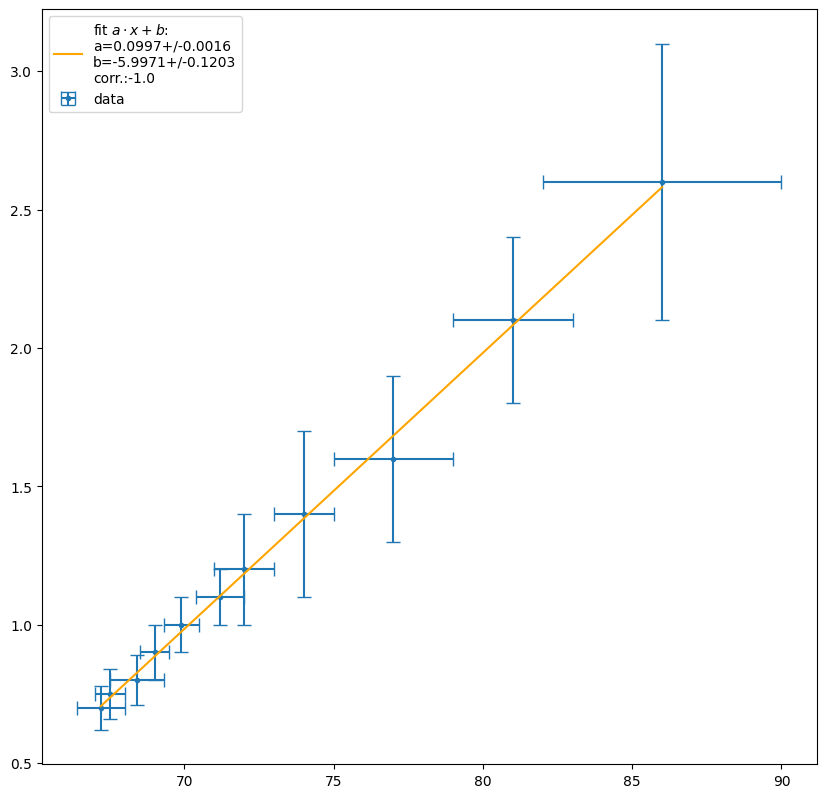

       x   ex     y    ey
5   67.2  0.8  0.70  0.08
6   67.5  0.5  0.75  0.09
4   68.4  0.9  0.80  0.09
7   69.0  0.5  0.90  0.10
3   69.9  0.6  1.00  0.10
8   71.2  0.8  1.10  0.10
2   72.0  1.0  1.20  0.20
9   74.0  1.0  1.40  0.30
1   77.0  2.0  1.60  0.30
10  81.0  2.0  2.10  0.30
0   86.0  4.0  2.60  0.50


In [5]:
plot(q,Gy,errq,errGy,fit=True)
a1,sigmaa1,b1,sigmab1,rho1=lin_fit_sigma_fit(q,Gy)

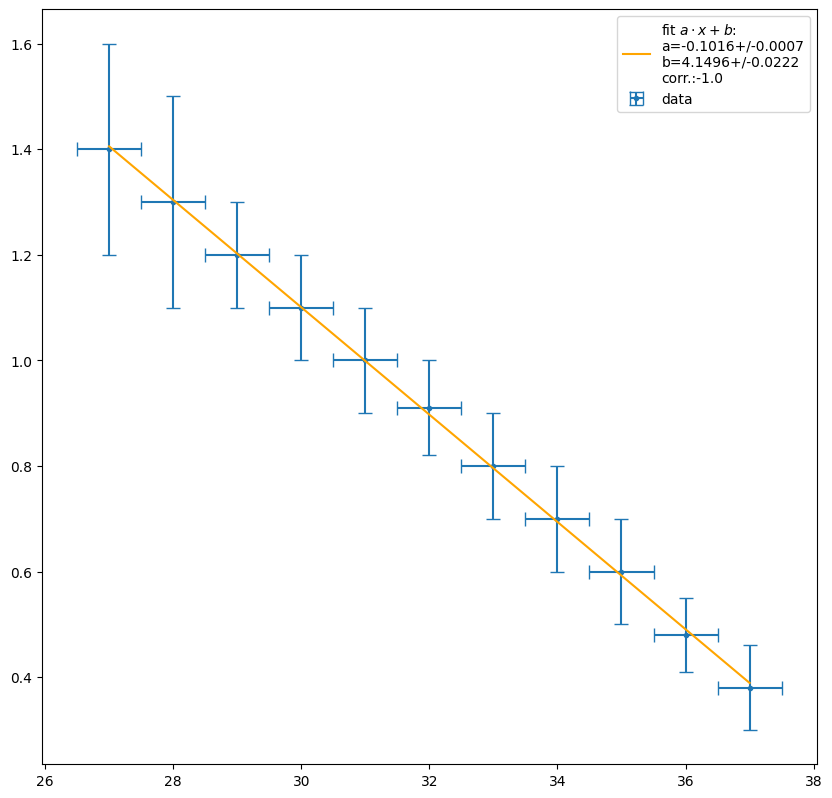

       x   ex     y    ey
5   27.0  0.5  1.40  0.20
6   28.0  0.5  1.30  0.20
4   29.0  0.5  1.20  0.10
7   30.0  0.5  1.10  0.10
3   31.0  0.5  1.00  0.10
8   32.0  0.5  0.91  0.09
2   33.0  0.5  0.80  0.10
9   34.0  0.5  0.70  0.10
1   35.0  0.5  0.60  0.10
10  36.0  0.5  0.48  0.07
0   37.0  0.5  0.38  0.08


In [6]:
plot(p,Gy_inv,errp,err_Gy_inv,True)
a2,sigmaa2,b2,sigmab2,rho2=lin_fit_sigma_fit(p,Gy_inv)

In [7]:
errf2=rs(mepd(1,0,a2,sigmaa2),1)
f2=reb(-1/a2,errf2)
print('f2=({} +/- {})cm'.format(f2,errf2))

dx2_b2=-1/a2
dx2_a2=(1+b2)/a2**2
alpha2=np.array([dx2_b2, dx2_a2])
alpha2T=np.array([[dx2_b2],[dx2_a2]])
cov2=np.array([[sigmab2**2, sigmaa2*sigmab2*rho2],[sigmaa2*sigmab2*rho2, sigmaa2**2]])
errx2=np.sqrt(np.dot( alpha2, np.dot(cov2, alpha2T) ))
errx2=rs(errx2,1)
errx2=errx2[0]
errx2
x2=reb(-(b2+1)/a2 ,errx2)
print(r'x2=({} +/- {})cm'.format(x2, errx2))

f2=(9.84 +/- 0.07)cm
x2=(50.7 +/- 0.1)cm


In [8]:
errf1=rs(mepd(1,0,a1,sigmaa1),1)
f1=reb(1/a1,errf1)
print('f1=({} +/- {})cm'.format(f1,errf1))

dx1_b1=1/a1
dx1_a1=(1+b1)/a1**2
alpha1=np.array([dx1_b1, dx1_a1])
alpha1T=np.array([[dx1_b1],[dx1_a1]])
cov1=np.array([[sigmab1**2, sigmaa1*sigmab1*rho1],[sigmaa1*sigmab1*rho1, sigmaa1**2]])
errx1=np.sqrt(np.dot( alpha1, np.dot(cov1, alpha1T) ))
errx1=rs(errx1,1)
errx1=errx1[0]
errx1
x1=reb(-(b1+1)/a1 ,errx1)
print(r'x1=({} +/- {})cm'.format(x1, errx1))

f1=(10.0 +/- 0.2)cm
x1=(50.0 +/- 2.0)cm


In [9]:
def wm(sample,sigmas):
    w=np.power(sigmas,-2)
    c=(sample*w).sum()/w.sum()
    s=np.power(1/w.sum(),0.5)
    return (c,s)
f,ef=wm(np.array([f1,f2]),np.array([errf1,errf2]))
ef=rs(ef,1)
f=reb(f,ef)
print('f=({} +/- {})cm'.format(f,ef))
x,ex=wm(np.array([x1,x2]),np.array([errx1,errx2]))
ex=rs(ex,1)
x=reb(x,ex)
print('x=({} +/- {})cm'.format(x,ex))

f=(9.86 +/- 0.07)cm
x=(50.7 +/- 0.1)cm
